# K-Nearest-Neighbors Model

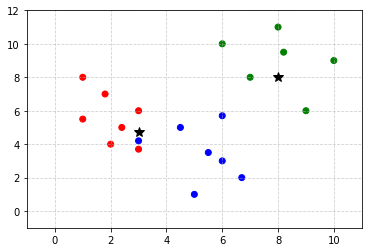

In [9]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt


# lists of points
points = np.array([(1, 8), (2.4, 5), (3,6), (2,4), (1.8, 7), (3, 3.7), (1, 5.5),
                   (7,8), (9, 6), (10, 9), (6,10), (8,11), (8.2,9.5),
                   (5,1), (6, 3), (6, 5.7), (4.5,5), (5.5,3.5), (6.7, 2), (3,4.2)])

classes = np.array([0, 0, 0, 0, 0, 0, 0, 
                    1, 1, 1, 1, 1, 1, 
                    2, 2, 2, 2, 2, 2, 2])

unknown = np.array([(3, 4.7), (8,8)])

# plotting
colors = ['red','green','blue']
plt.scatter(*zip(*points), c=classes, cmap=mpl.colors.ListedColormap(colors))
plt.plot(*zip(*unknown), '*', color='black', markersize=10)
plt.xlim((-1,11))
plt.ylim((-1,12))
plt.grid(linestyle='--', alpha=0.6)

In [2]:
from sklearn.neighbors import KNeighborsClassifier
# get the training data in the right format

# Create a nearest neighbors object
#k = 1 #K nearest points
#nn = KNeighborsClassifier(n_neighbors=k)
nn = KNeighborsClassifier() 

#default, model will automatically select when k has not been determined


# train the classifier using the labeled points
nn.fit(points, classes)

# it has three classess and each one has 7, 7, 6 points respectivley

# test the confidence of the model for different K
accuracy = nn.score(points,classes)
print(accuracy)

0.95


In [3]:
# predict the value of the unknown points. 
predictions = nn.predict(unknown)

# print the predictions
print([colors[i] for i in predictions])

['red', 'green']


# Mathmatic Analysis

In [4]:
dataset = {'black':[[1,2],[2,3],[3,1]], 'red':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

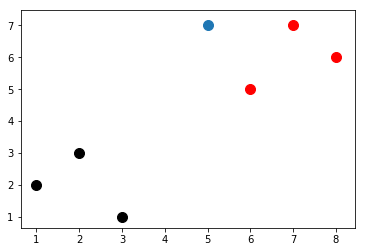

In [5]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)
plt.show()

In [6]:
from collections import Counter
from math import sqrt
def k_nearest_neighbors(data,predict,k):
    if len(data) >= k:
        print("warnings: K is set to a value less than the length of dataset")
    distances = []
    # group is the class of dataset, feature is the estimated point in group
    for group in data:
        for features in data[group]:
            #euclidean_distance=np.linalg.norm(np.array(features)-np.array(predict))
            euclidean_distance = sqrt((features[0]-predict[0])**2+(features[1]-predict[1])**2)
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    print(Counter(votes).most_common(1))
    vote_result = Counter(votes).most_common(1)
    return [vote_result,votes,distances]

In [7]:
result = k_nearest_neighbors(dataset,new_features,4)

[('red', 3)]


In [8]:
# the drawback of KNN now is obviously that if the dataset if large, the process will cost lots of time
print(result[0],'\n',result[1],'\n',result[2])

[('red', 3)] 
 ['red', 'red', 'red', 'black'] 
 [[6.4031242374328485, 'black'], [5.0, 'black'], [6.324555320336759, 'black'], [2.23606797749979, 'red'], [2.0, 'red'], [3.1622776601683795, 'red']]
